In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('apple_quality.csv')

In [3]:
df.head()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
df = df[:-2]

In [5]:
class_mappings = {"bad":0,"good":1}
df['Quality'] = df['Quality'].map(class_mappings)

In [6]:
features = df[["Size","Weight","Sweetness","Crunchiness","Juiciness","Ripeness","Acidity"]].to_numpy()
output = df[["Quality"]].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split


In [8]:
output

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.2)

In [10]:
from sklearn.linear_model import  LogisticRegression

In [11]:
lr = LogisticRegression(penalty='l2', solver='liblinear')

In [12]:
lr.fit(X_train, y_train)

c:\Users\praya\miniconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [13]:
y_pred = lr.predict(X_test)


In [14]:
def accuracy_sklearn(y, y_pred):
    total = len(y)
    correct = 0 
    for y_i, y_pred_i in zip(y,y_pred):
        if (y_i== y_pred_i):
            correct +=1
    
    return correct/total

In [15]:
accuracy_sklearn(y_test,y_pred)

0.7375

In [16]:
from sklearn.metrics import  classification_report

In [17]:
y_test.sum()

400

In [18]:
print(classification_report(y_test,y_pred, target_names = class_mappings.keys()))

              precision    recall  f1-score   support

         bad       0.74      0.73      0.73       400
        good       0.73      0.75      0.74       400

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



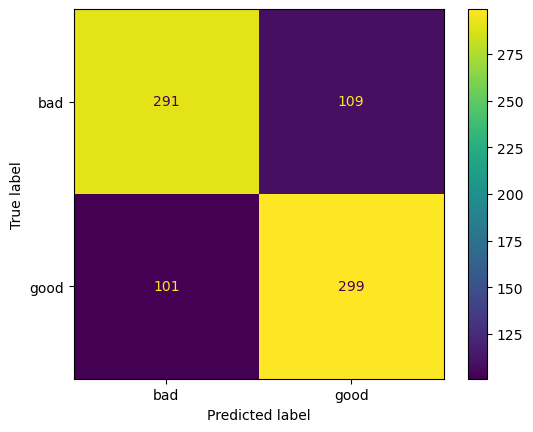

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
dis = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_mappings.keys())
dis.plot()

In [20]:
# support vector machines

from sklearn import svm


In [21]:
s = svm.SVC()

In [22]:
s.fit(X_train, y_train)

c:\Users\praya\miniconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [23]:
y_pred = s.predict(X_test)

In [24]:
accuracy_sklearn(y_test, y_pred)

0.8825

In [25]:
print(classification_report(y_true=y_test, y_pred=y_pred,target_names=class_mappings.keys()))

              precision    recall  f1-score   support

         bad       0.89      0.87      0.88       400
        good       0.88      0.89      0.88       400

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



In [28]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
cd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_mappings.keys())

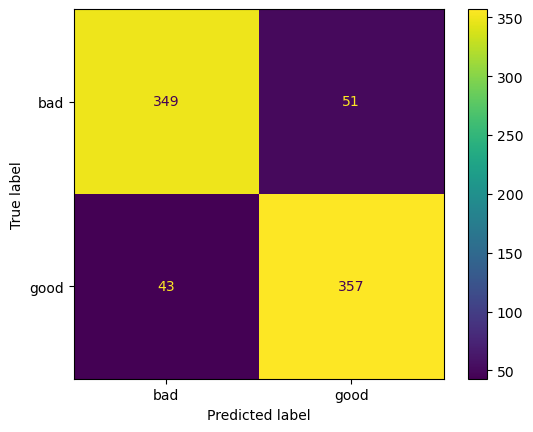

In [29]:
cd.plot()